In [1]:
#Import all the library function required for the EDA analysis


import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Reading the csv file using pandas lib 
loan_df = pd.read_csv("/home/sudi/UpGrad/loan.csv",low_memory=False)

In [3]:
# head() will show the no of coloumns with upper rows 
loan_df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [4]:
# info will give the breif about the coloumns and data present in the coloumns
loan_df.info

<bound method DataFrame.info of             id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  \
0      1077501    1296599       5000         5000           4975.0   
1      1077430    1314167       2500         2500           2500.0   
2      1077175    1313524       2400         2400           2400.0   
3      1076863    1277178      10000        10000          10000.0   
4      1075358    1311748       3000         3000           3000.0   
...        ...        ...        ...          ...              ...   
39712    92187      92174       2500         2500           1075.0   
39713    90665      90607       8500         8500            875.0   
39714    90395      90390       5000         5000           1325.0   
39715    90376      89243       5000         5000            650.0   
39716    87023      86999       7500         7500            800.0   

             term int_rate  installment grade sub_grade  ...  \
0       36 months   10.65%       162.87     B        B2  ...   

In [5]:
# shape will give the ( no of rows , no of coloumns ) presnt in current dataset
loan_df.shape

(39717, 111)

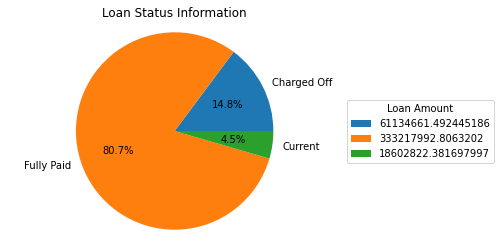

In [6]:
# plotting pie chart for different types of loan_status
chargedOff_loans = loan_df.loc[(loan_df["loan_status"]) == "Charged Off"]
current_loans = loan_df.loc[(loan_df["loan_status"] == "Current")]
fullyPaid_loans = loan_df.loc[(loan_df["loan_status"]== "Fully Paid")]

data  = [{"Charged Off": chargedOff_loans["funded_amnt_inv"].sum(), 
          "Fully Paid":fullyPaid_loans["funded_amnt_inv"].sum(), 
          "Current":current_loans["funded_amnt_inv"].sum()}]

total_investment = pd.DataFrame(data)

chargedOffTotal = float(total_investment["Charged Off"])
fullyPaidTotal = float(total_investment["Fully Paid"])
currentTotal  = float(total_investment["Current"])
loan_status = [chargedOffTotal,fullyPaidTotal,currentTotal]
loan_status_labels = 'Charged Off','Fully Paid','Current'
plt.pie(loan_status,labels=loan_status_labels,autopct='%1.1f%%')
plt.title('Loan Status Information')
plt.axis('equal')
plt.legend(loan_status,title="Loan Amount",loc="center left",bbox_to_anchor=(1, 0, 0.5, 1))
plt.show()

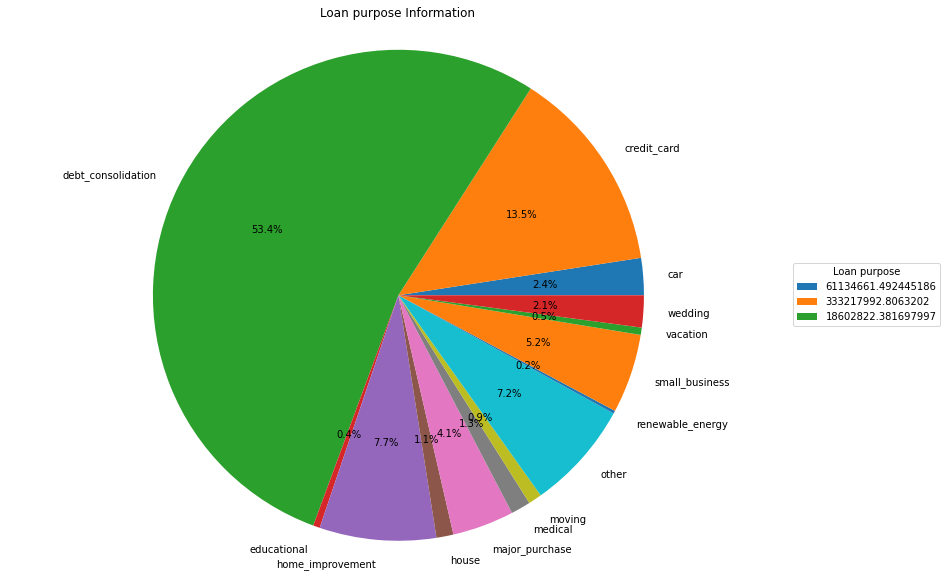

In [7]:
# plotting pie chart for different types of purpose
loans_purpose = loan_df.groupby(['purpose'])['funded_amnt_inv'].sum().reset_index()
plt.figure(figsize=(14, 10))
plt.pie(loans_purpose["funded_amnt_inv"],labels=loans_purpose["purpose"],autopct='%1.1f%%')
plt.title('Loan purpose Information')
plt.axis('equal')
plt.legend(loan_status,title="Loan purpose",loc="center left",bbox_to_anchor=(1, 0, 0.5, 1))
plt.show()

In [8]:
# Removing the data that is filled with NULL values
loan = loan_df.dropna(axis=1, how="all")
print(" Remaining Data Columns info:")
print(loan.info(max_cols=200))

 Remaining Data Columns info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 57 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   member_id                   39717 non-null  int64  
 2   loan_amnt                   39717 non-null  int64  
 3   funded_amnt                 39717 non-null  int64  
 4   funded_amnt_inv             39717 non-null  float64
 5   term                        39717 non-null  object 
 6   int_rate                    39717 non-null  object 
 7   installment                 39717 non-null  float64
 8   grade                       39717 non-null  object 
 9   sub_grade                   39717 non-null  object 
 10  emp_title                   37258 non-null  object 
 11  emp_length                  38642 non-null  object 
 12  home_ownership              39717 non-null  object 
 13  a

In [9]:
# removing the unwanted data / not important for the credit insights columns

remove_cols = ["id", "member_id", "funded_amnt", "emp_title", "emp_length" , "pymnt_plan", "url", "desc", 
 "title", "zip_code", "delinq_2yrs", "mths_since_last_delinq", "mths_since_last_record",
 "revol_bal", "initial_list_status", "out_prncp", "out_prncp_inv", "total_pymnt",
 "total_pymnt_inv", "total_rec_prncp", "total_rec_int", "total_rec_late_fee", "recoveries","application_type",
 "annual_inc_joint","dti_joint","verification_status_joint","tot_coll_amt","tot_cur_bal",
 "open_acc_6m","open_il_6m","open_il_12m","open_il_24m",
 "acc_now_delinq","total_bal_il","il_util","open_rv_12m","open_rv_24m","max_bal_bc","mths_since_rcnt_il",
 "all_util","total_rev_hi_lim","inq_fi","total_cu_tl","inq_last_12m","acc_open_past_24mths",
 "avg_cur_bal","bc_open_to_buy","bc_util","mo_sin_old_il_acct","mo_sin_old_rev_tl_op","mo_sin_rcnt_rev_tl_op",
 "mo_sin_rcnt_tl","mort_acc","mths_since_recent_bc","mths_since_recent_bc_dlq","mths_since_recent_inq",
 "mths_since_recent_revol_delinq","num_accts_ever_120_pd","num_actv_bc_tl","num_actv_rev_tl",
 "num_bc_sats","num_bc_tl","num_bc_tl","num_il_tl","num_op_rev_tl","num_rev_accts","num_rev_tl_bal_gt_0","num_sats",
 "num_tl_120dpd_2m","num_tl_30dpd","num_tl_90g_dpd_24m","num_tl_op_past_12m","pct_tl_nvr_dlq",
 "percent_bc_gt_75","tot_hi_cred_lim","total_bal_ex_mort","total_bc_limit","total_il_high_credit_limit",
 "collection_recovery_fee", "last_pymnt_d", "last_pymnt_amnt", "next_pymnt_d", "last_credit_pull_d",
 "collections_12_mths_ex_med", "mths_since_last_major_derog","policy_code", "chargeoff_within_12_mths",
 "delinq_amnt", "tax_liens", "pub_rec_bankruptcies", "addr_state" ]
loan_df.drop(remove_cols, axis=1, inplace=True)
list(loan_df.columns)

['loan_amnt',
 'funded_amnt_inv',
 'term',
 'int_rate',
 'installment',
 'grade',
 'sub_grade',
 'home_ownership',
 'annual_inc',
 'verification_status',
 'issue_d',
 'loan_status',
 'purpose',
 'dti',
 'earliest_cr_line',
 'inq_last_6mths',
 'open_acc',
 'pub_rec',
 'revol_util',
 'total_acc']

In [10]:

loan_df.info

<bound method DataFrame.info of        loan_amnt  funded_amnt_inv        term int_rate  installment grade  \
0           5000           4975.0   36 months   10.65%       162.87     B   
1           2500           2500.0   60 months   15.27%        59.83     C   
2           2400           2400.0   36 months   15.96%        84.33     C   
3          10000          10000.0   36 months   13.49%       339.31     C   
4           3000           3000.0   60 months   12.69%        67.79     B   
...          ...              ...         ...      ...          ...   ...   
39712       2500           1075.0   36 months    8.07%        78.42     A   
39713       8500            875.0   36 months   10.28%       275.38     C   
39714       5000           1325.0   36 months    8.07%       156.84     A   
39715       5000            650.0   36 months    7.43%       155.38     A   
39716       7500            800.0   36 months   13.75%       255.43     E   

      sub_grade home_ownership  annual_inc 

In [11]:
# remove the rows with loan_status as "Current"
loan_df = loan_df[loan_df["loan_status"].apply(lambda x:False if x == "Current" else True)]

# update loan_status as Fully Paid to 0 and Charged Off to 1
loan_df["loan_status"] = loan_df["loan_status"].apply(lambda x: 0 if x == "Fully Paid" else 1)

In [42]:
loan_df['term'] = pd.to_numeric(loan_df['term'].str.replace("months",""))
loan_df.head()

,loan_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,home_ownership,annual_inc,verification_status,...,inq_last_6mths,open_acc,pub_rec,revol_util,total_acc,int_rate_1,revol_util_1,loan_amnt_range,int_rate_range,annual_inc_range
0,5000,4975.0,36,10.65,162.87,B,B2,RENT,24000.0,Verified,...,1,3,0,83.7,9,10.65,83.70,0-5000,10-12.5,0-25000
1,2500,2500.0,60,15.27,59.83,C,C4,RENT,30000.0,Source Verified,...,5,3,0,9.4,4,15.27,9.40,0-5000,15+,25000-50000
2,2400,2400.0,36,15.96,84.33,C,C5,RENT,12252.0,Not Verified,...,2,2,0,98.5,10,15.96,98.50,0-5000,15+,0-25000
3,10000,10000.0,36,13.49,339.31,C,C1,RENT,49200.0,Source Verified,...,1,10,0,21.0,37,13.49,21,5000-10000,12.5-15,25000-50000
5,5000,5000.0,36,7.90,156.46,A,A4,RENT,36000.0,Source Verified,...,3,9,0,28.3,12,7.90,28.30,0-5000,7.5-10,25000-50000


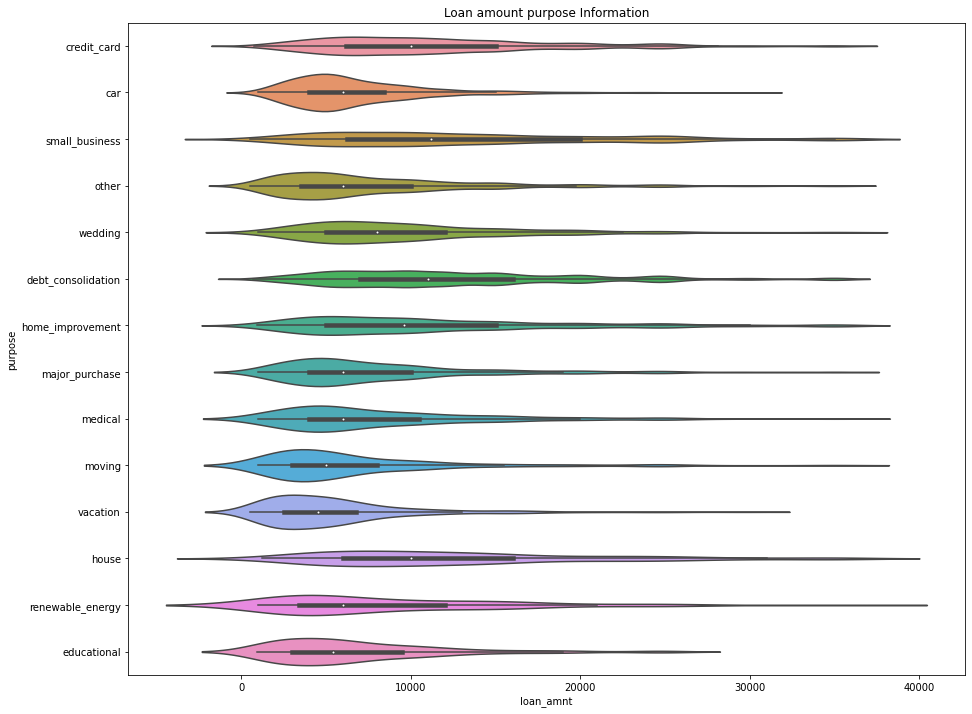

In [13]:
plt.figure(figsize=(15, 12))
plt.title('Loan amount purpose Information')
sns.violinplot(x='loan_amnt',y='purpose',data=loan_df)
plt.show()

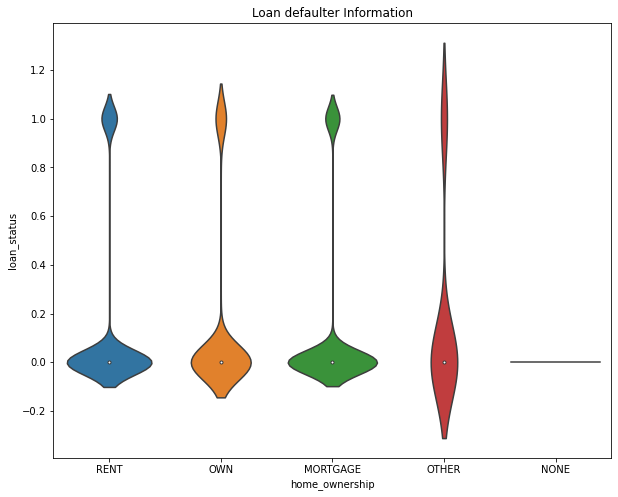

In [14]:
plt.figure(figsize=(10, 8))
plt.title('Loan defaulter Information')
sns.violinplot(x='home_ownership',y='loan_status',data=loan_df)
plt.show()

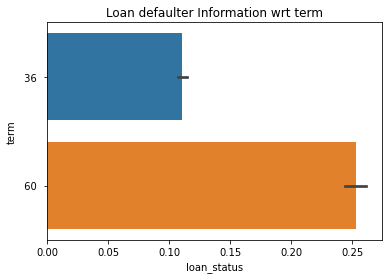

In [15]:

plt.title('Loan defaulter Information wrt term')
sns.barplot(x='loan_status',y='term',data=loan_df)
plt.show()

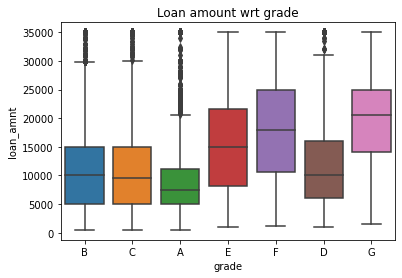

In [16]:
plt.title('Loan amount wrt grade')
sns.boxplot(x='grade',y='loan_amnt',data=loan_df)
plt.show()

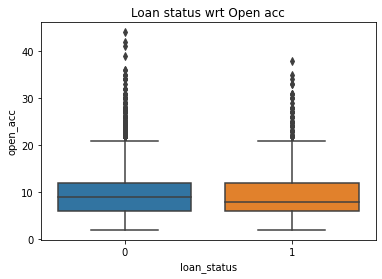

In [17]:
plt.title('Loan status wrt Open acc')
sns.boxplot(x='loan_status',y='open_acc',data=loan_df)
plt.show()

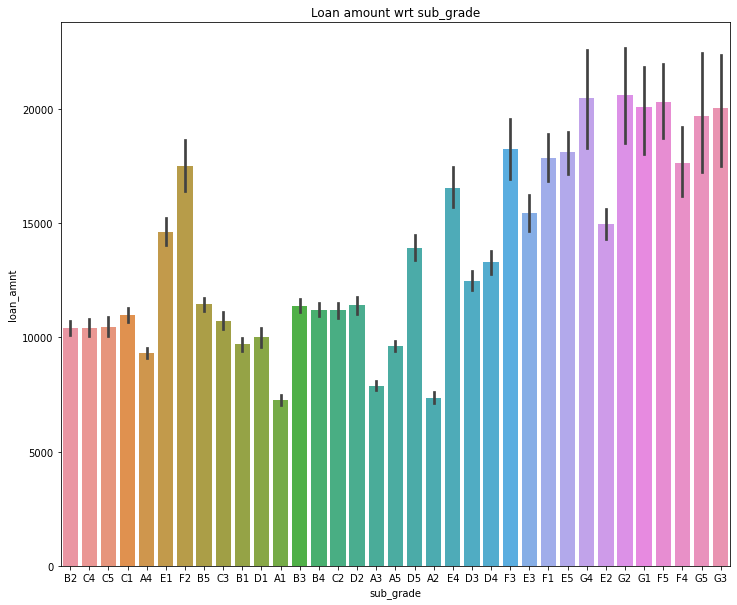

In [18]:
plt.figure(figsize=(12, 10))
plt.title('Loan amount wrt sub_grade')
sns.barplot(x='sub_grade',y='loan_amnt',data=loan_df)
plt.show()

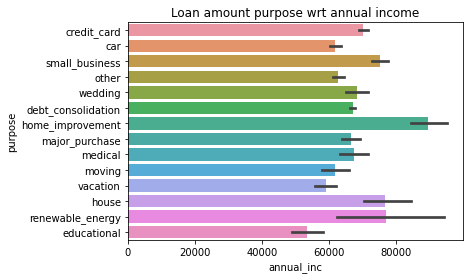

In [19]:
plt.title('Loan amount purpose wrt annual income')
sns.barplot(x='annual_inc',y='purpose',data=loan_df)
plt.show()

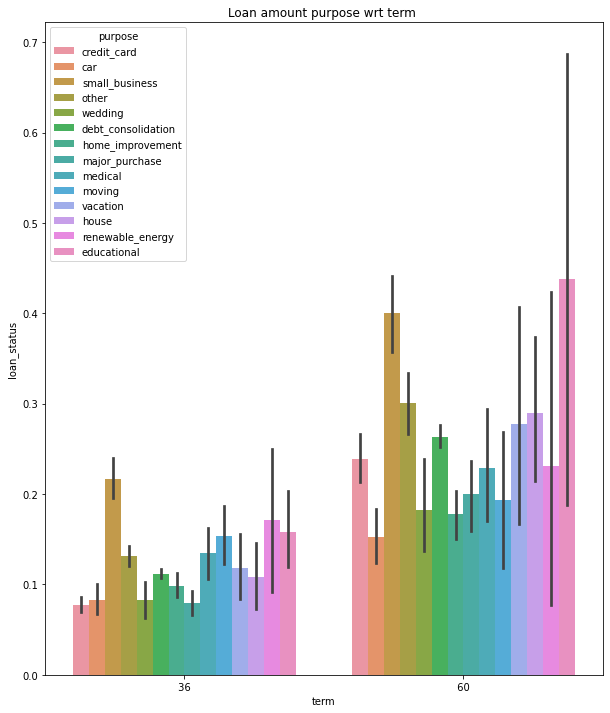

In [20]:
plt.figure(figsize=(10, 12))
plt.title('Loan amount purpose wrt term ')
sns.barplot(x='term',y='loan_status',hue='purpose',data=loan_df)
plt.show()

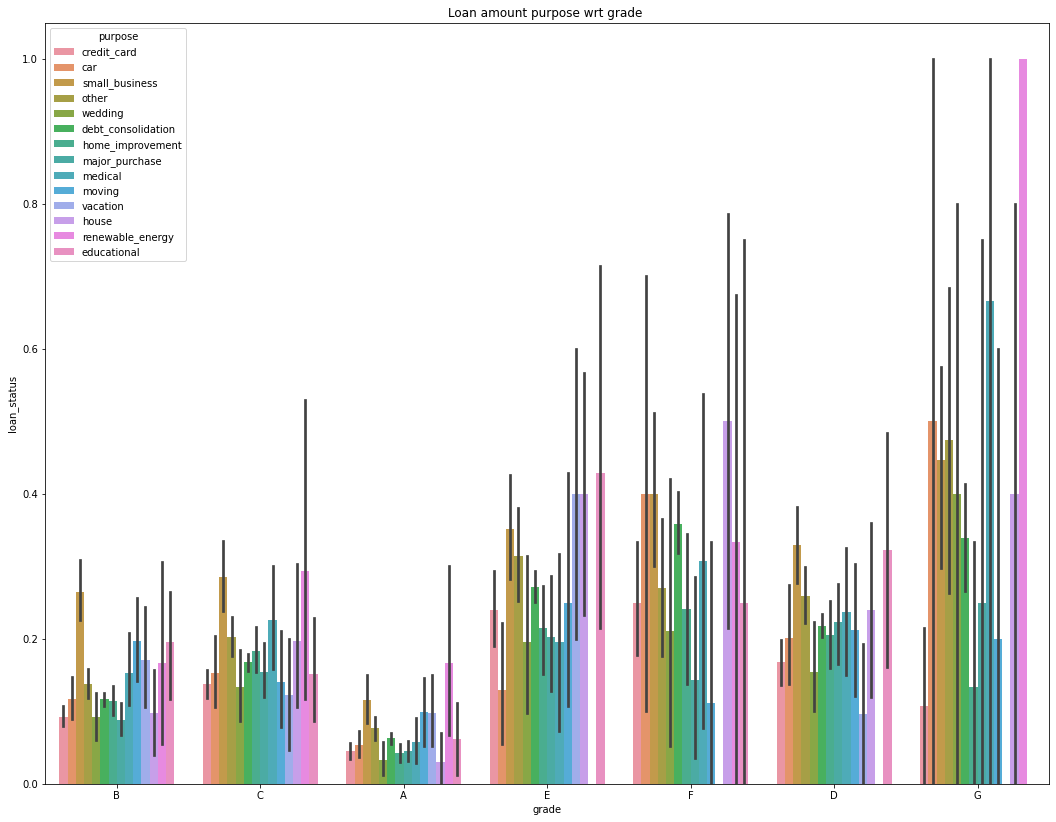

In [21]:
plt.figure(figsize=(18, 14))
plt.title('Loan amount purpose wrt grade ')
sns.barplot(x='grade',y='loan_status',hue='purpose',data=loan_df)
plt.show()

In [39]:
loan_df['int_rate'] = pd.to_numeric(loan_df['int_rate'].str.replace("%","")) 
loan_df['revol_util'] = pd.to_numeric(loan_df['revol_util'].str.replace("%",""))
loan_df.head()

,loan_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,home_ownership,annual_inc,verification_status,...,dti,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_util,total_acc,int_rate_1,revol_util_1,loan_amnt_range
0,5000,4975.0,36,10.65,162.87,B,B2,RENT,24000.0,Verified,...,27.65,Jan-85,1,3,0,83.7,9,10.65,83.70,0-5000
1,2500,2500.0,60,15.27,59.83,C,C4,RENT,30000.0,Source Verified,...,1.00,Apr-99,5,3,0,9.4,4,15.27,9.40,0-5000
2,2400,2400.0,36,15.96,84.33,C,C5,RENT,12252.0,Not Verified,...,8.72,Nov-01,2,2,0,98.5,10,15.96,98.50,0-5000
3,10000,10000.0,36,13.49,339.31,C,C1,RENT,49200.0,Source Verified,...,20.00,Feb-96,1,10,0,21.0,37,13.49,21,5000-10000
5,5000,5000.0,36,7.90,156.46,A,A4,RENT,36000.0,Source Verified,...,11.20,Nov-04,3,9,0,28.3,12,7.90,28.30,0-5000


In [40]:
# create bins for loan_amnt range
bins = [0, 5000, 10000, 15000, 20000, 25000, 36000]
bucket_l = ['0-5000', '5000-10000', '10000-15000', '15000-20000', '20000-25000','25000+']
loan_df['loan_amnt_range'] = pd.cut(loan_df['loan_amnt'], bins, labels=bucket_l)
# create bins for int_rate range
bins = [0, 7.5, 10, 12.5, 15, 100]
bucket_l = ['0-7.5', '7.5-10', '10-12.5', '12.5-15', '15+']
loan_df['int_rate_range'] = pd.cut(loan_df['int_rate'], bins, labels=bucket_l)
# create bins for annual_inc range
bins = [0, 25000, 50000, 75000, 100000, 1000000]
bucket_l = ['0-25000', '25000-50000', '50000-75000', '75000-100000', '100000+']
loan_df['annual_inc_range'] = pd.cut(loan_df['annual_inc'], bins, labels=bucket_l)


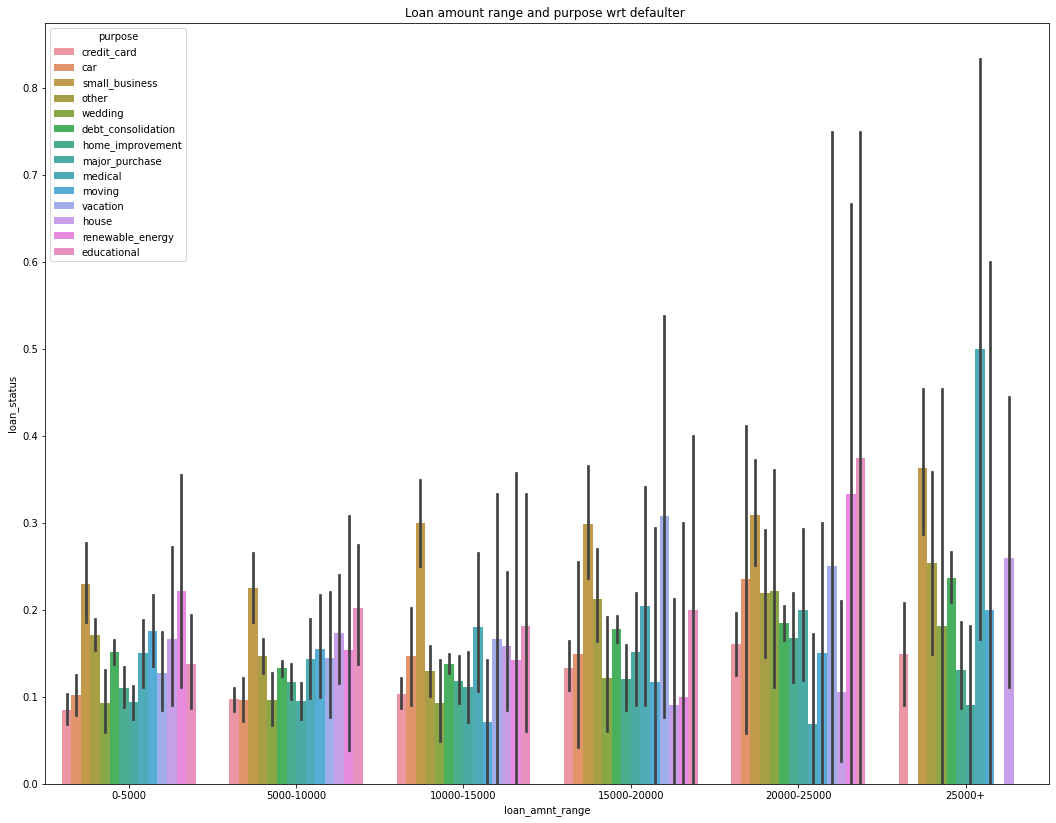

In [46]:
plt.figure(figsize=(18, 14))
plt.title('Loan amount range and purpose wrt defaulter ')
sns.barplot(x='loan_amnt_range',y='loan_status',hue='purpose',data=loan_df)
plt.show()

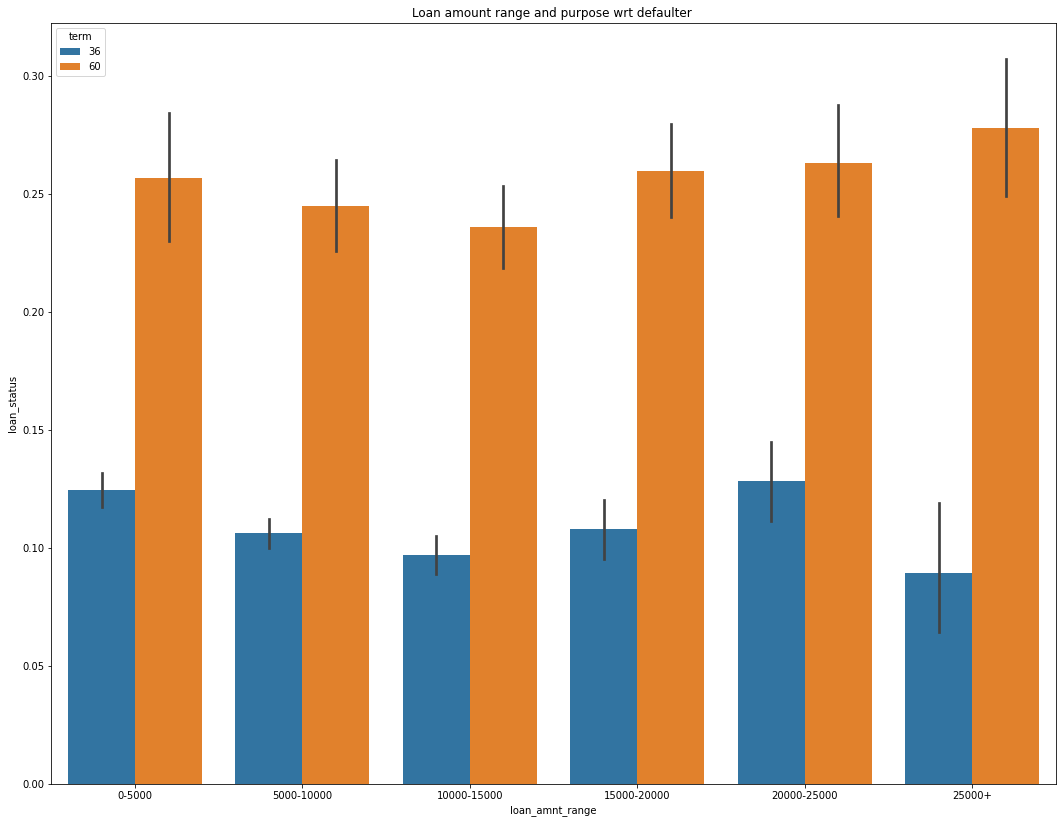

In [48]:
plt.figure(figsize=(18, 14))
plt.title('Loan amount range and purpose wrt defaulter ')
sns.barplot(x='loan_amnt_range',y='loan_status',hue='term',data=loan_df)
plt.show()

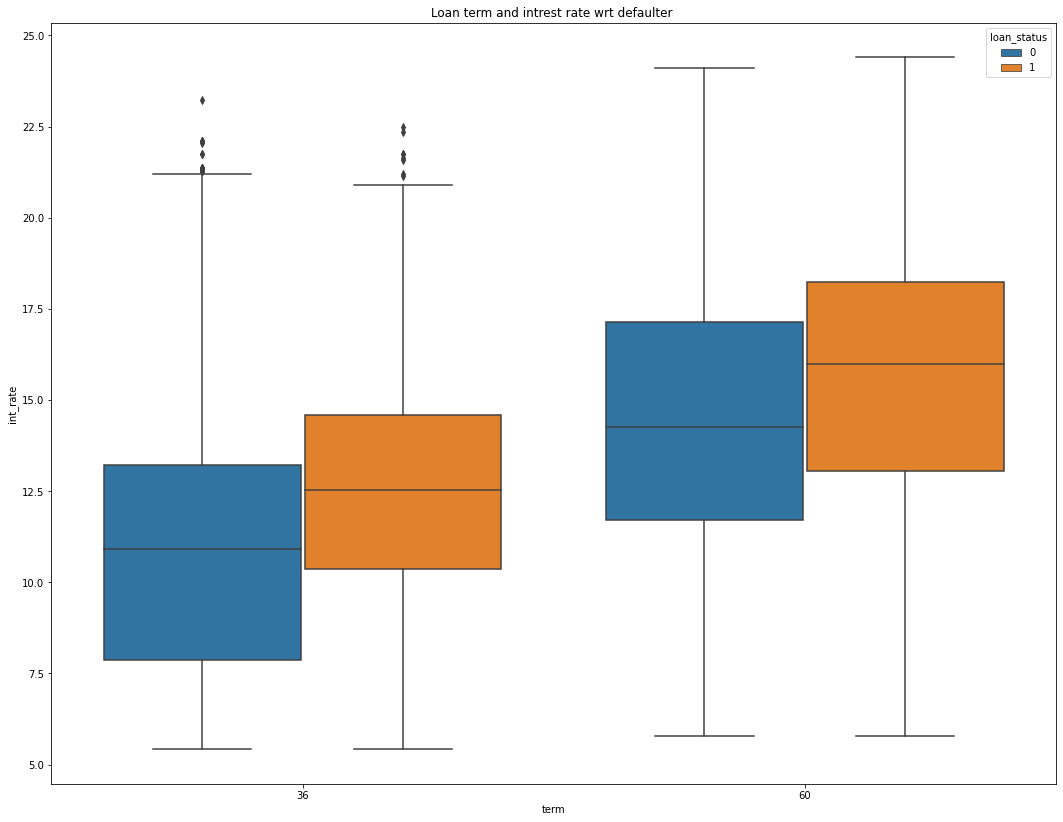

In [51]:
plt.figure(figsize=(18, 14))
plt.title('Loan term and intrest rate wrt defaulter ')
sns.boxplot(x='term',y='int_rate',hue='loan_status',data=loan_df)
plt.show()

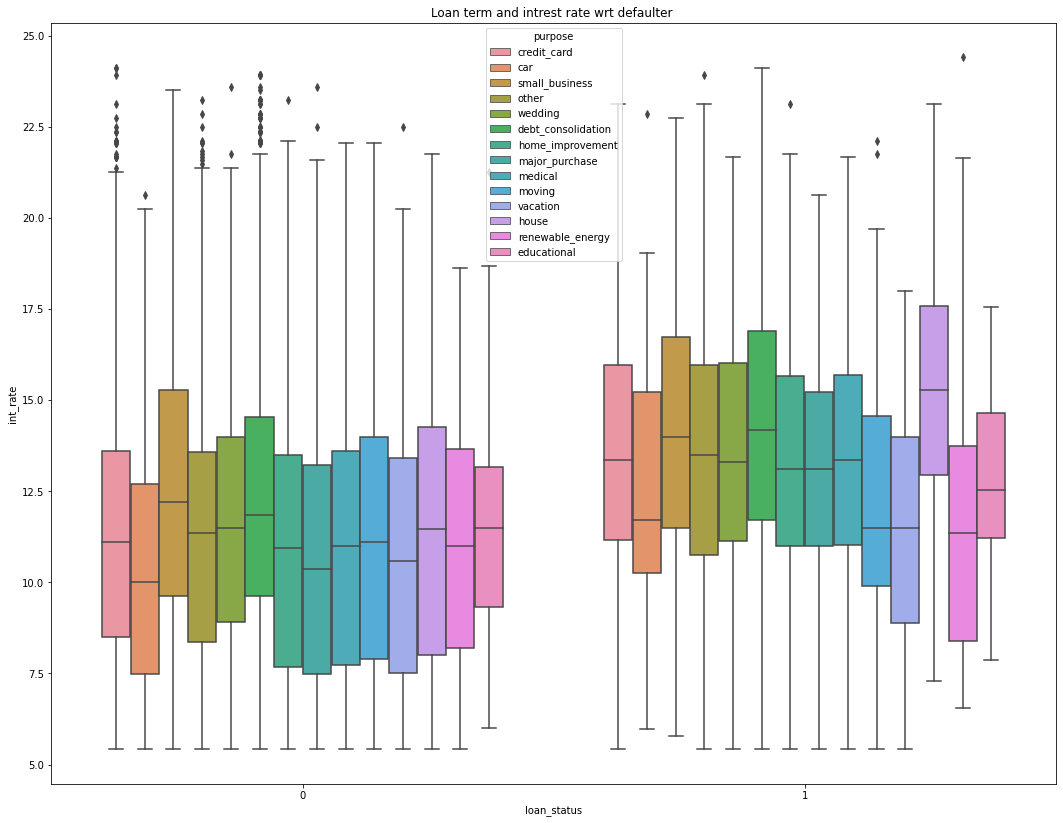

In [53]:
plt.figure(figsize=(18, 14))
plt.title('Loan term and intrest rate wrt defaulter ')
sns.boxplot(x='loan_status',y='int_rate',hue='purpose',data=loan_df)
plt.show()

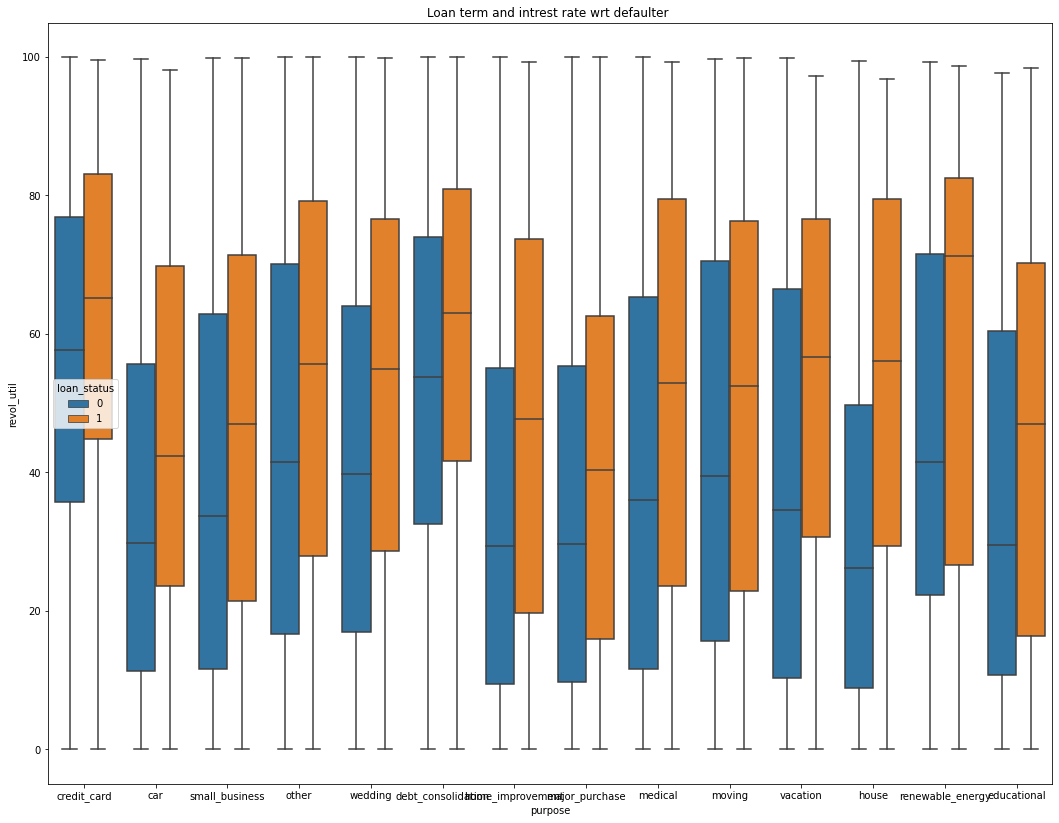

In [56]:
plt.figure(figsize=(18, 14))
plt.title('Loan term and intrest rate wrt defaulter ')
sns.boxplot(x='purpose',y='revol_util',hue='loan_status',data=loan_df)
plt.show()

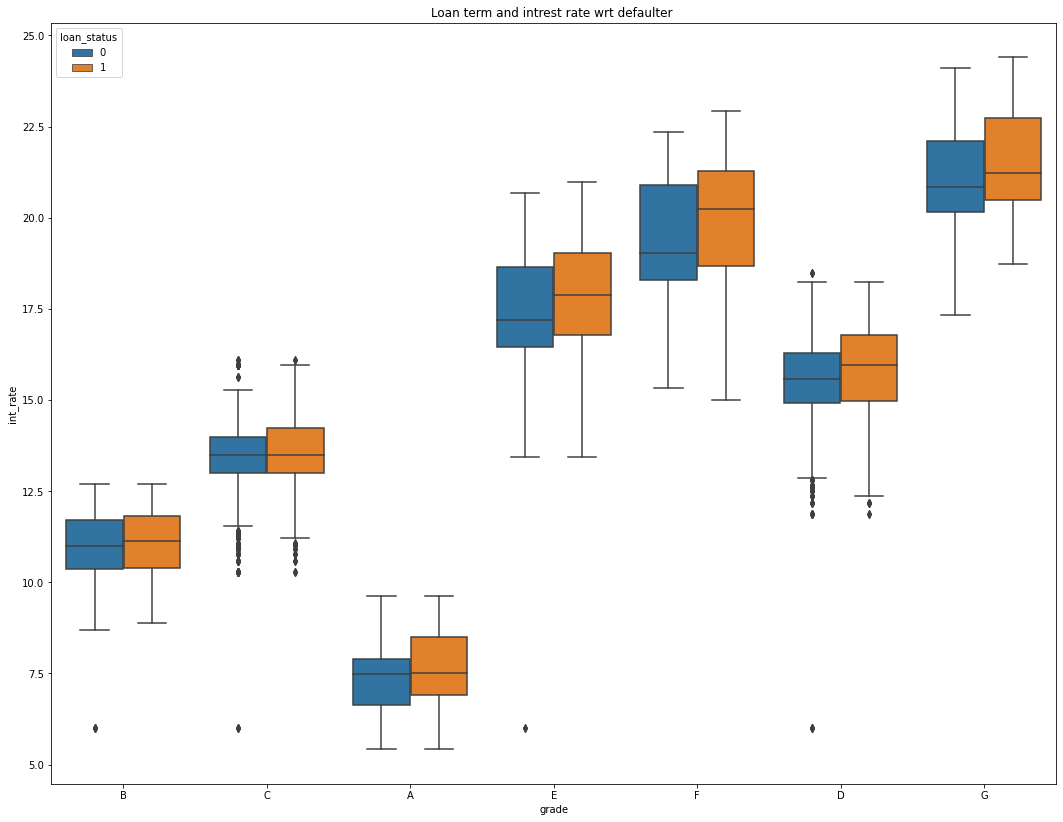

In [58]:
plt.figure(figsize=(18, 14))
plt.title('Loan term and intrest rate wrt defaulter ')
sns.boxplot(x='grade',y='int_rate',hue='loan_status',data=loan_df)
plt.show()

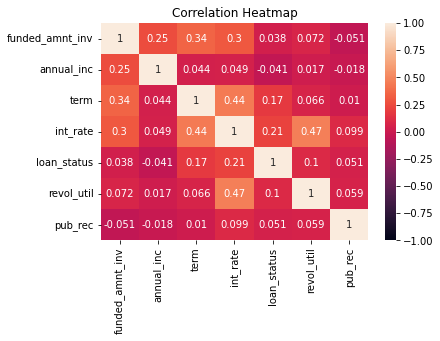

In [62]:
# plot heat map to see correlation between features
continuous_f = ["funded_amnt_inv", "annual_inc", "term", "int_rate", "loan_status", "revol_util", "pub_rec", "earliest_cr_line"]
loan_corr = loan_df[continuous_f].corr()
sns.heatmap(loan_corr,vmin=-1.0,vmax=1.0,annot=True)
plt.title("Correlation Heatmap")
plt.show()